In [1]:
# IMporting the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

#Dta collection
#Read Dataset  
data=pd.read_csv('C:\\Users\\HP\\Desktop\\brain_stroke.csv')
print(data.head())

   gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1    Male  80.0             0              1          Yes        Private   
2  Female  49.0             0              0          Yes        Private   
3  Female  79.0             1              0          Yes  Self-employed   
4    Male  81.0             0              0          Yes        Private   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  
0          Urban             228.69  36.6  formerly smoked       1  
1          Rural             105.92  32.5     never smoked       1  
2          Urban             171.23  34.4           smokes       1  
3          Rural             174.12  24.0     never smoked       1  
4          Urban             186.21  29.0  formerly smoked       1  


In [4]:
print(data.dtypes)

print(data.describe())

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object
               age  hypertension  heart_disease  avg_glucose_level  \
count  4981.000000   4981.000000    4981.000000        4981.000000   
mean     43.419859      0.096165       0.055210         105.943562   
std      22.662755      0.294848       0.228412          45.075373   
min       0.080000      0.000000       0.000000          55.120000   
25%      25.000000      0.000000       0.000000          77.230000   
50%      45.000000      0.000000       0.000000          91.850000   
75%      61.000000      0.000000       0.000000         113.860000   
max      82.000000      1.000000       1.000000         271.740000   

               bmi       stroke  
co

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

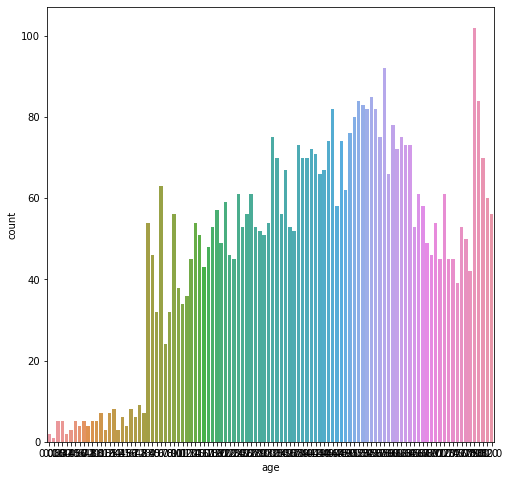

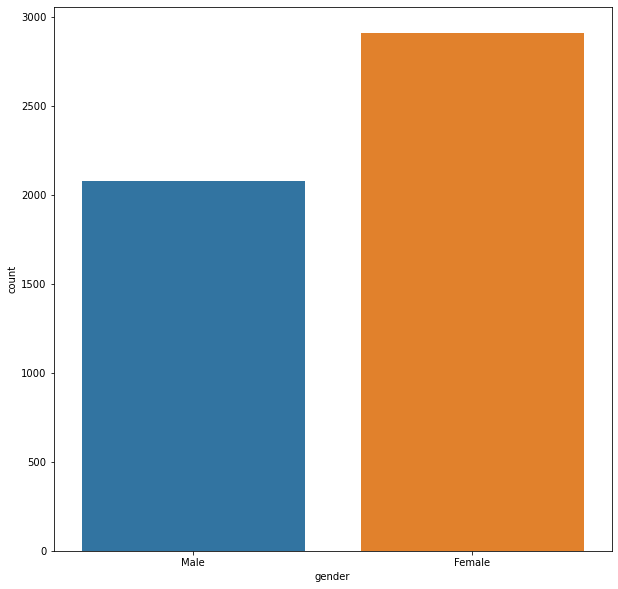

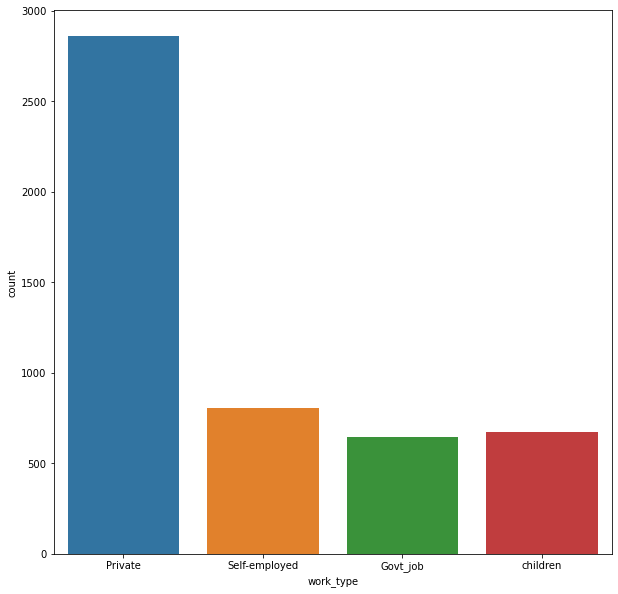

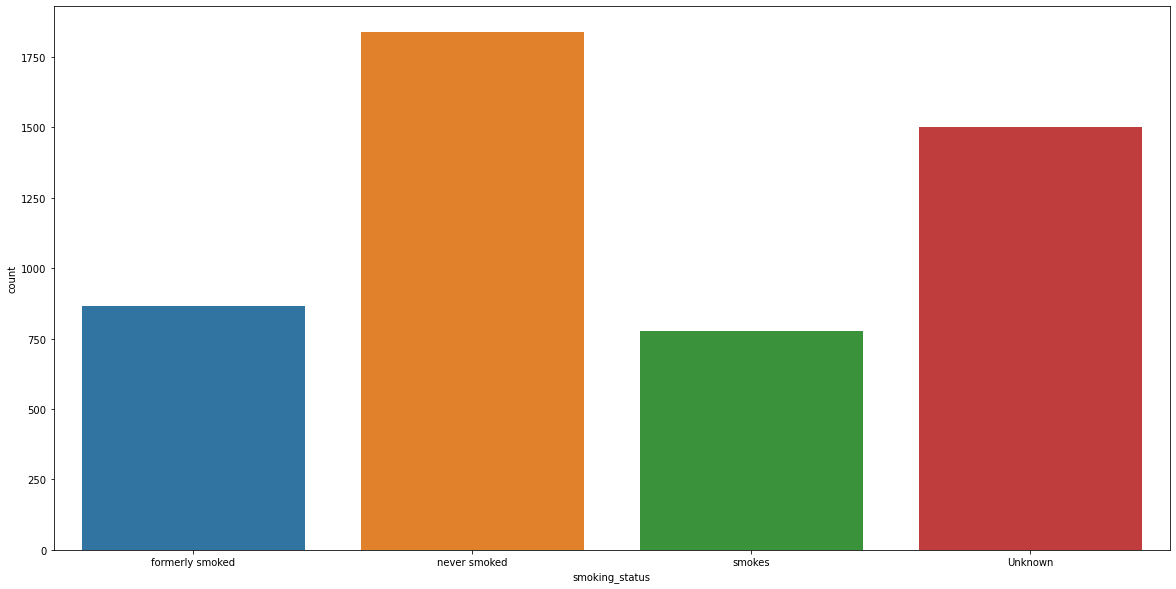

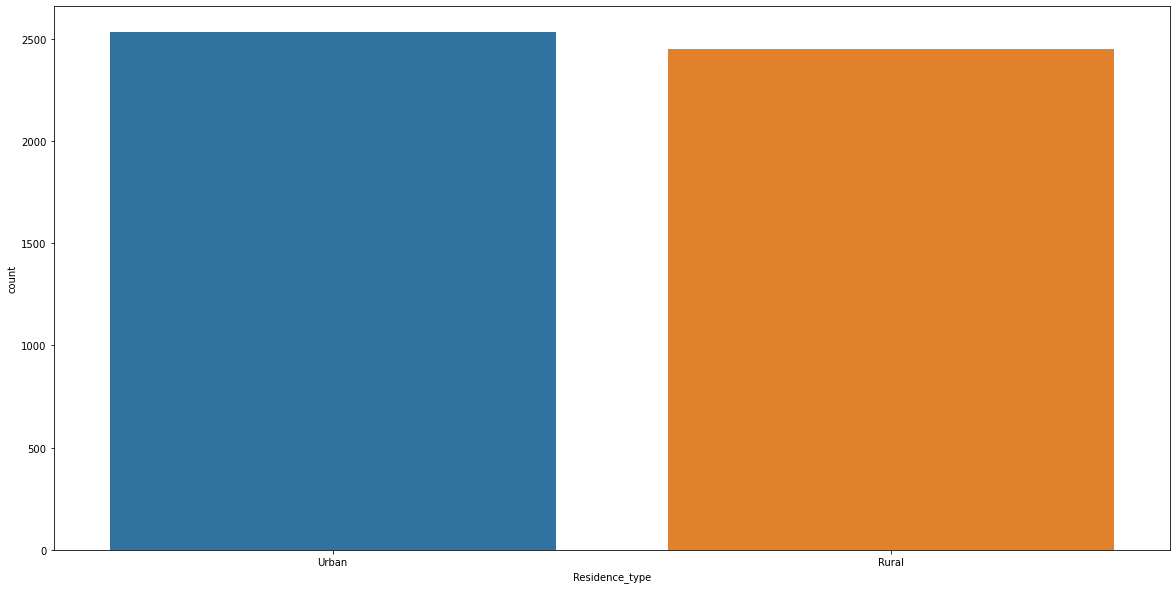

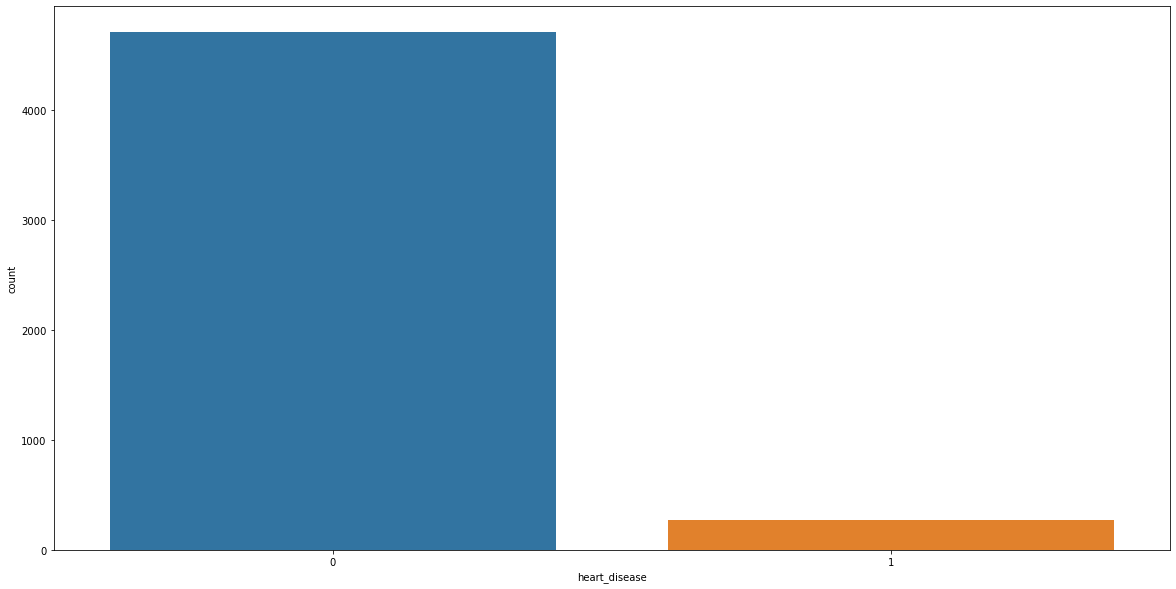

In [7]:
#Univariate analysis
plt.figure(figsize=(8,8))
sns.countplot(x='age',data=data)

plt.figure(figsize=(10,10))
sns.countplot(x='gender',data=data)

plt.figure(figsize=(10,10))
sns.countplot(x='work_type',data=data)
plt.figure(figsize=(20,10))
sns.countplot(x='smoking_status',data=data)
plt.figure(figsize=(20,10))
sns.countplot(x='Residence_type',data=data)
plt.figure(figsize=(20,10))
sns.countplot(x='heart_disease',data=data)


<AxesSubplot:xlabel='hypertension', ylabel='count'>

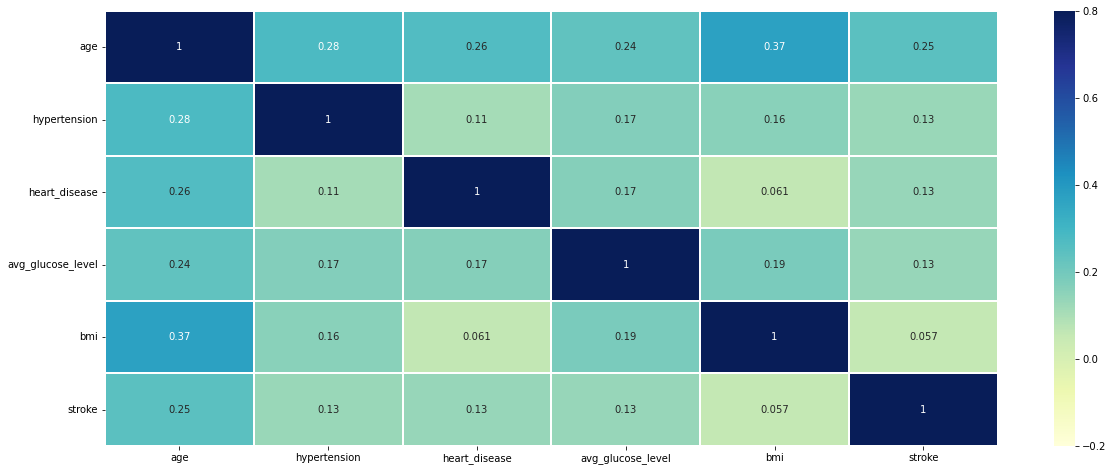

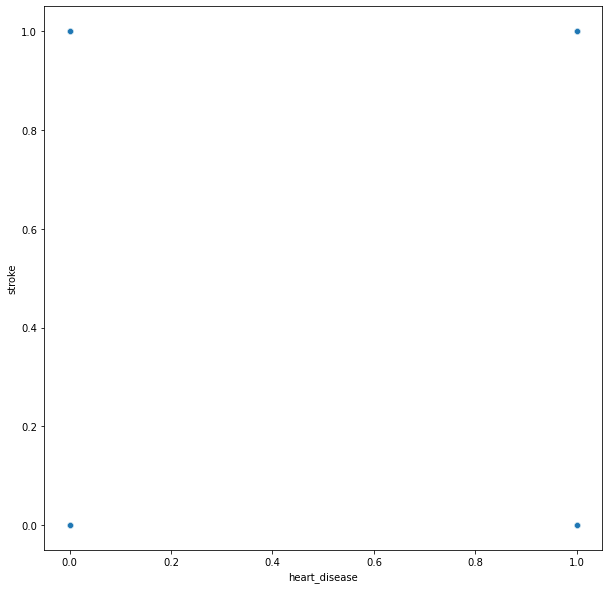

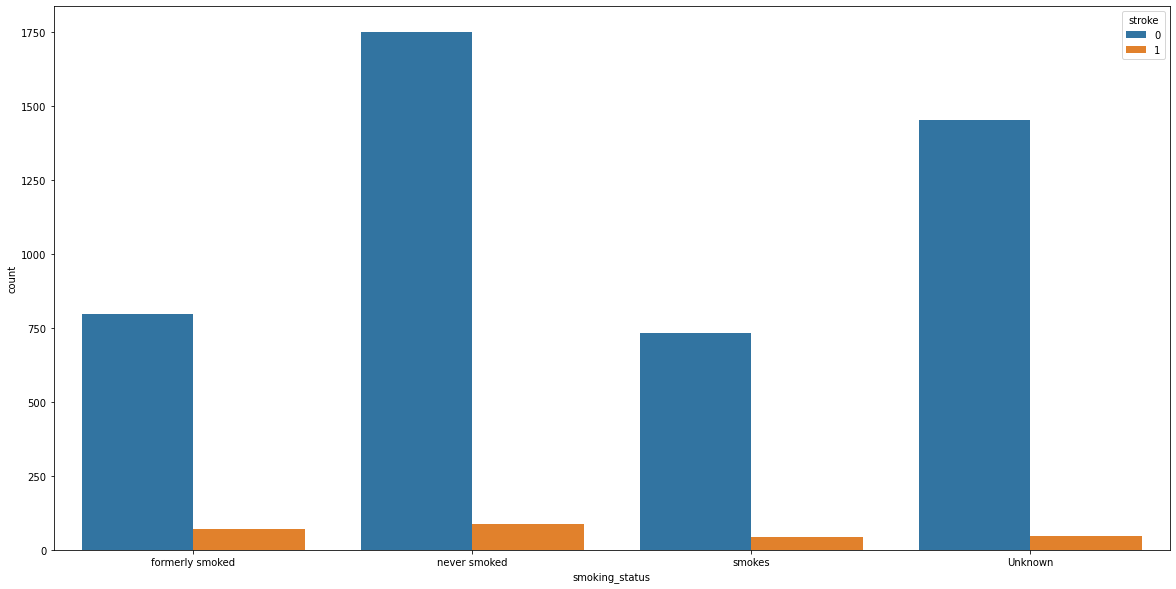

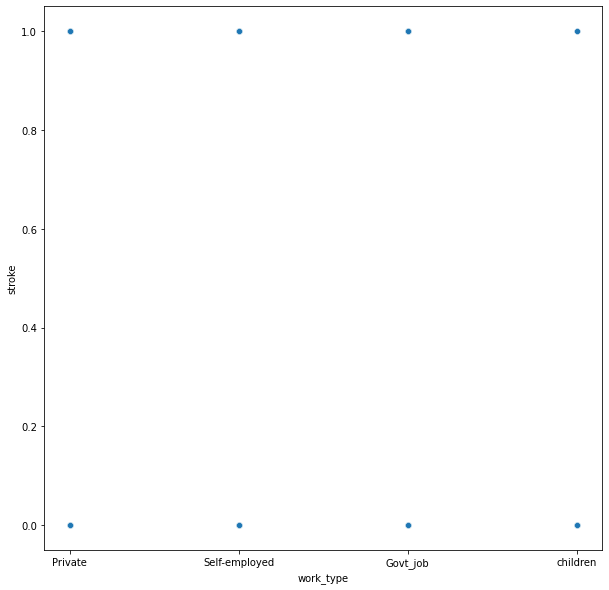

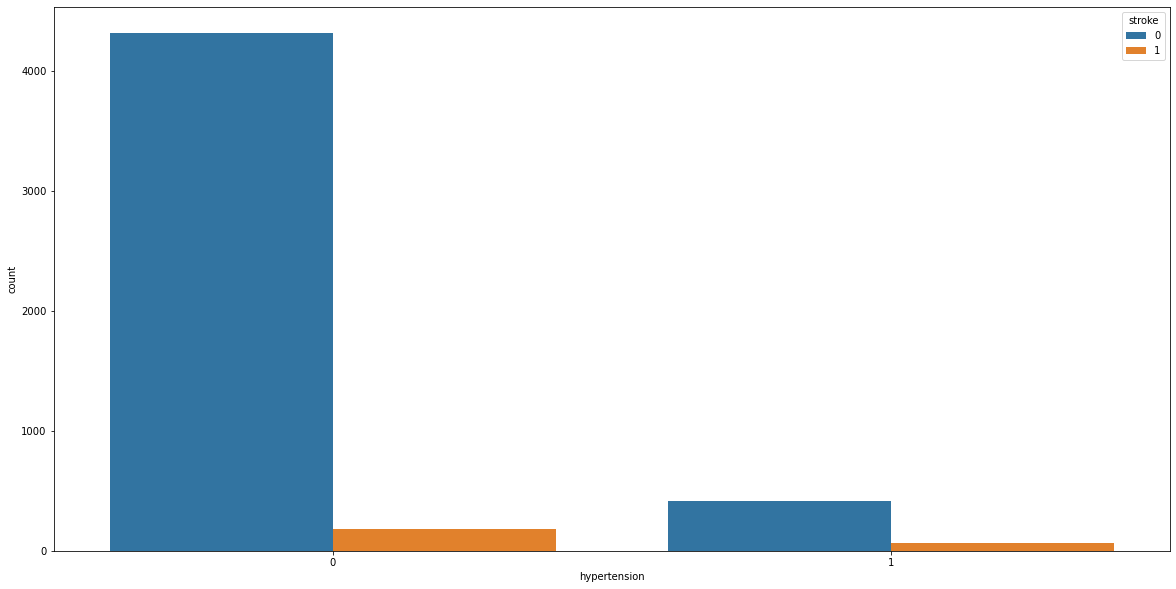

In [10]:
#Bivariate analysis
# Correlation Analysis of numerical features
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmin=-.2,vmax=.8,annot=True,linewidth=0.2,cmap='YlGnBu')

plt.figure(figsize=(10,10))
sns.scatterplot(data['heart_disease'],data['stroke'])
plt.figure(figsize=(20,10))
sns.countplot(x='smoking_status',hue='stroke',data=data)
plt.figure(figsize=(10,10))
sns.scatterplot(data['work_type'],data['stroke'])
plt.figure(figsize=(20,10))
sns.countplot(x='hypertension',hue='stroke',data=data)



In [15]:
#PreProcessing
#Missing value Handling

data.isna().sum()
data.columns


Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [16]:
# One hot encoding
data = pd.get_dummies(data, columns = ['gender','ever_married'],drop_first=True)


In [17]:

from sklearn.preprocessing import LabelEncoder
label_en=LabelEncoder()
a=['work_type']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
label_en=LabelEncoder()
a=['Residence_type']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])
a=['smoking_status']
for i in np.arange(len(a)):
    data[a[i]]=label_en.fit_transform(data[a[i]])

In [19]:
data.head()



,age,hypertension,heart_disease,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,gender_Male,ever_married_Yes
0,67.0,0,1,1,1,228.69,36.6,1,1,1,1
1,80.0,0,1,1,0,105.92,32.5,2,1,1,1
2,49.0,0,0,1,1,171.23,34.4,3,1,0,1
3,79.0,1,0,2,0,174.12,24.0,2,1,0,1
4,81.0,0,0,1,1,186.21,29.0,1,1,1,1


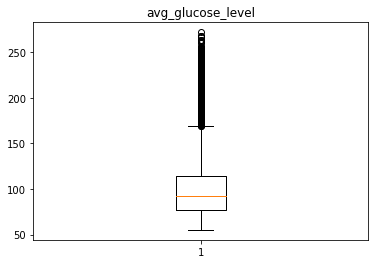

54.94499999999999
168.805


In [20]:
# Checking outliers in the column 'total_male'
plt.boxplot(data['avg_glucose_level'])
plt.title("avg_glucose_level")
plt.show()
# Handling outliers in the column 'total_female'
Q1=np.percentile(data['avg_glucose_level'],25,interpolation='midpoint')
Q2=np.percentile(data['avg_glucose_level'],50,interpolation='midpoint')
Q3=np.percentile(data['avg_glucose_level'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1=1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['avg_glucose_level']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['avg_glucose_level']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)

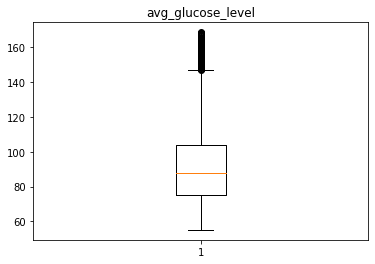

In [21]:
# Checking outliers in the column 'total_male'
plt.boxplot(data['avg_glucose_level'])
plt.title("avg_glucose_level")
plt.show()

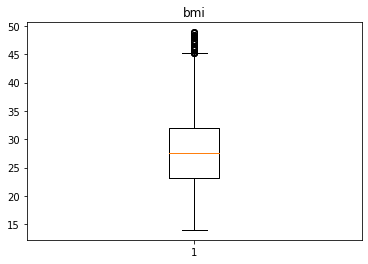

13.200000000000001
45.2


In [23]:
plt.boxplot(data['bmi'])
plt.title("bmi")
plt.show()
Q1=np.percentile(data['bmi'],25,interpolation='midpoint')
Q2=np.percentile(data['bmi'],50,interpolation='midpoint')
Q3=np.percentile(data['bmi'],75,interpolation='midpoint')
IQR = Q3 - Q1
lowlim=Q1=1.5*IQR
uplim=Q3+1.5*IQR
print(lowlim)
print(uplim)
outlier = []
for x in data['bmi']:
    if ((x>uplim) or (x<lowlim)):
        outlier.append(x)
ind1=data['bmi']>uplim
y=data.loc[ind1].index

data.drop(y,inplace = True)

In [26]:
data.dtypes
# Setting x and y parameters
# x denotes feature columns and y denotes target columns
x=data.drop(['stroke'],axis=1)
y=pd.DataFrame(data['stroke'])
#Standardization/Normalization
from sklearn import preprocessing
min_max=preprocessing.MinMaxScaler(feature_range=(0,1))
x=min_max.fit_transform(x)
x=pd.DataFrame(x)
x.describe()

,0,1,2,3,4,5,6,7,8,9
count,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000,4337.000000
mean,0.501152,0.074937,0.039659,0.443163,0.506341,0.319928,0.442163,0.449466,0.410191,0.627392
std,0.274663,0.263319,0.195179,0.294308,0.500017,0.198983,0.206894,0.361529,0.491925,0.483555
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279785,0.000000,0.000000,0.333333,0.000000,0.175766,0.294872,0.000000,0.000000,0.000000
50%,0.511719,0.000000,0.000000,0.333333,1.000000,0.290419,0.435897,0.666667,0.000000,1.000000
75%,0.707031,0.000000,0.000000,0.666667,1.000000,0.430433,0.573718,0.666667,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
#Feature Engineering
# Splitting the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)


In [28]:
# Model 1 : Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

from sklearn.metrics import f1_score,confusion_matrix,accuracy_score,mean_squared_error
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_test,y_pred,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred)) 
print('MSE :',mean_squared_error(y_test,y_pred))

Confusion matrix : 
 [[1249    1]
 [  52    0]]
F1_score : 0.9592933947772657
Accuracy : 0.9592933947772657
MSE : 0.040706605222734255


In [29]:
# Model 2 : Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)
print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[1210   40]
 [  42   10]]
F1_score : 0.9370199692780338
Accuracy : 0.9370199692780338


In [30]:
# Model 3 : Logistic Regression
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred=logit_model.predict(x_test)

print('Confusion matrix : \n',confusion_matrix(y_test,y_pred))
print('F1_score :',f1_score(y_pred, y_test,average='micro'))
print('Accuracy :',accuracy_score(y_test,y_pred))

Confusion matrix : 
 [[1250    0]
 [  52    0]]
F1_score : 0.9600614439324117
Accuracy : 0.9600614439324117


In [31]:
#Model Fine Tuning
rf.fit(x_train,y_train)
rft=RandomForestClassifier(n_estimators=150,max_depth=10,random_state=42,criterion='entropy')
rft.fit(x_train,y_train)
y_pred=rft.predict(x_test)
print('F1 score : ',f1_score(y_test,y_pred,average='micro'))
print('Accuracy : ', accuracy_score(y_test,y_pred))

F1 score :  0.9600614439324117
Accuracy :  0.9600614439324117


In [41]:
data.columns
data.head()
array = [45,0,0,1,0,100,23,0,0,1]
  
series_obj = pd.Series(array)
  
arr = series_obj.values
  
reshaped_arr = arr.reshape(1,-1)
predn=rf.predict(reshaped_arr)
print(predn)


[0]
